[(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3)]


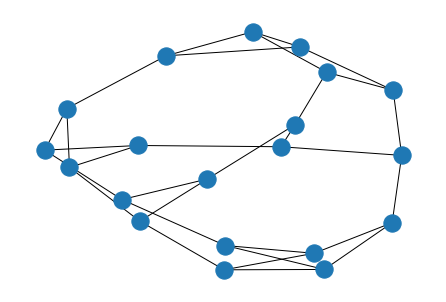

In [107]:
import networkx as nx
x = nx.random_degree_sequence_graph([3 for i in range(20)], seed=56)
print(x.degree())
lcc_set = max(nx.connected_components(x), key=len)
x = nx.convert_node_labels_to_integers(
        x, first_label=0)
nx.draw(x)

In [219]:
import random as rnd

class Proposer(object):
    def __init__(self):
        print('initialized proposer')
    def event(self):
        self.current_block = Block(self, self.current_block)
        # debug
        # print('Huzza! {} was proposed.'.format(self.current_block))
        
        self.local_blockchain.add(self.current_block)
        self.global_blockchain.append(self.current_block)
        
        # tracks the neighbours self.Node didnt gossip
        self.non_gossiped_to = self.neighbors.copy()
        #TODO: remove
        self.attestations.attest() 
        print('proposed block')

class Validator(object):
    def __init__(self):
        print('initialized validator')
    def event(self):
        print('voted block')

class Node(Proposer, Validator):
    counter = 0

    @classmethod
    def __update(cls):
        cls.counter += 1

    def __init__(self, blockchain):
        Proposer.__init__(self)
        Validator.__init__(self)
        self.__update()
        self.id = self.counter
        self._slotRole = None

    @property
    def slotRole(self):
        """I'm the 'x' property."""
        print("getter of x called")
        return self._slotRole

    @slotRole.setter
    def slotRole(self, value):
        print("setter of x called")
        self._slotRole = value

    def event(self):
        if self._slotRole == 'Proposer':
            Proposer.event(self)
        else:
            Validator.event(self)

    def __repr__(self):
        return '<Node {}>'.format(self.id)

    #TODO: gossip blocks, naming should be changed accordingly
    def gossip(self, listening_node):
        #self.non_gossiped_to.remove(listening_node)
        listening_node.listen(self)

    #TODO: listen blocks, naming should be changed accordingly
    def listen(self, gossiping_node):
        """Receive new block and update local information accordingly.
        """
        block = gossiping_node.current_block 
        self.current_block = gossiping_node.current_block
        self.update_local_blockchain(self.current_block)
        #self.current_block.nodes.add(self)
        self.non_gossiped_to = self.neighbors.copy()
        self.non_gossiped_to.remove(gossiping_node)
               
        # [Teja] handles attestation here
        # if self.is_attesting == True:
        #     self.attestations.attest()

    def update_local_blockchain(self, block):
        """When self.Node receive a new block, update the local copy of the blockchain.
        """
        while block not in self.local_blockchain:
            self.local_blockchain.add(block)
            self.attestations.check_cache(block)
            block = block.parent 

    
#     if self.is_attesting == True:
#         self.attestations.attest()
# nodes = [Node() for i in range(5)]
# proposer_index = rnd.choice(range(5))
# proposer_nodes = nodes[proposer_index]
# validator_nodes = nodes[~proposer_index]

# print(proposer_nodes, validator_nodes)

n = Node() 
n.slotRole = 'Proposer'
n.event()
    
    

initialized proposer
initialized validator
setter of x called
proposed block


In [111]:
12 % 3


0